<h1 align="center" style="color:yellow;font-size:40px">Opening a Restaurant in West Hyderabad, Telanagana, India</h1>

## **1.Introduction/ Business Problem**

There are more than 2000 restaurants in *Greater Hyderabad region*. Hence, to open any kind of restaurant in the city will be a challenging task for the investor. Here we concentrate on the west region of the Hyderabad City for convinience. Choosing a restaurant type and a good spot, an entrepreneur usually carelessly relies on common sense, gut feeling and domain knowledge. Needless to say that too often an inconsiderate decision leads to a poor income and inevitable bankruptcy. According to several surveys, up to 50% of such start-ups fail in the very first year. Let's suppose, an investor has enough time and money, as well as a passion to open the best eating spot in Hyderabad. For the past 5 years we have seen a significant increase in the business related to canteens and restaurants. So, we will have a better insight if we can answer the following.

*What type of restaurant would it be? What would be the best place for it? Is there a better way to answer these questions rather than guessing?*

What if there is a way to cluster city neighborhoods, based on their near-by restaurant similarity? What if we can visualize these clusters on a map? What if we might find what type of restaurant is the most and least popular in each location? Equipped with that knowledge, we might be able to make a smart choice from a huge number of restaurant types and available places.Let us allow machine learning to get the job done. Using reliable venue data, it can investigate the city neighborhoods, and show us unseen dependencies. Dependencies that we are not aware of.

## **2. Description of the Data**
> 1. Selection of the Neighborhoods in the west Hyderabad and by preparing the list of neighborhoods we can collect the geographical information.
> 2. Selected neighborhoods are as follows.
>> Gachibowli, Lingampally, Hitech City, Madhapur, KPHB Colony, BHEL, Chandanagar, Miyapur, Madinaguda, Masjid Banda, Kothaguda, Nizampet, Hafeezpet, Kondapur
> 3. By using the *Geopy* library we can get the location coordinates of each neighborhood in the list.
> 4. Later we will use *FourSquare8 API to get *Venue* dat at each neighborhoods.
> 5. Perform the *unsupervised learning* algorithm K-means clustering and name the clusters by analysing the venues in each clsuter.

### Importing required libraries

In [1]:
import pandas as pd #data analysis library
import requests # get the html source code from the site
from bs4 import BeautifulSoup # Parsing the source code html
import lxml 
import folium # Map visualization
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.pyplot as plt

### The geographical coordinates of the West Hyderabad

In [93]:
address = 'West Hyderabad, Telangana'

geolocator = Nominatim(user_agent="tg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of West Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of West Hyderabad are 17.419667, 78.448484.


### Selection of neighbourhoods and acquiring their coordinates
Here the neighbourhoods are selected based on region of Hyderabad. We use Geopy library to get the coordinates

In [3]:
Neigh = ['Gachibowli','Lingampally', 'Hitech City', 'Madhapur', 'KPHB Colony','BHEL', 'Chandanagar',
         'Miyapur', 'Madinaguda', 'Masjid Banda', 'Kothaguda', 'Nizampet', 'Hafeezpet', 'Kondapur']
geolocator = Nominatim(user_agent="tel_explorer")
lati = []
longi = []

for name in Neigh:
    print(name)
    addr = '{}, Hyderabad'.format(name)
    location = geolocator.geocode(addr)
    lati.append(location.latitude)
    longi.append(location.longitude)
    
print(Neigh)
print(lati)
print(longi)

Gachibowli
Lingampally
Hitech City
Madhapur
KPHB Colony
BHEL
Chandanagar
Miyapur
Madinaguda
Masjid Banda
Kothaguda
Nizampet
Hafeezpet
Kondapur
['Gachibowli', 'Lingampally', 'Hitech City', 'Madhapur', 'KPHB Colony', 'BHEL', 'Chandanagar', 'Miyapur', 'Madinaguda', 'Masjid Banda', 'Kothaguda', 'Nizampet', 'Hafeezpet', 'Kondapur']
[17.4436222, 17.4880496, 17.4698143, 17.4408578, 17.4922068, 25.3511791, 17.4872976, 17.4981608, 17.4917948, 17.4670374, 17.458705, 17.4976564, 17.4823997, 17.4587912]
[78.3519638, 78.316068, 78.3853779, 78.3916289, 78.3973638, 69.39119955000001, 78.3322142, 78.3567628, 78.342306, 78.3415168, 78.3638803, 78.3925073, 78.3630141, 78.3730556]


### Converting the neighbourhoods data in dataframe

In [4]:
Neighborhoods = {'Neighborhood':Neigh,
                'latitude': lati,
                'longitude': longi}
Neighborhoods = pd.DataFrame(Neighborhoods)
Neighborhoods

,Neighborhood,latitude,longitude
0,Gachibowli,17.443622,78.351964
1,Lingampally,17.488050,78.316068
2,Hitech City,17.469814,78.385378
3,Madhapur,17.440858,78.391629
4,KPHB Colony,17.492207,78.397364
5,BHEL,25.351179,69.391200
6,Chandanagar,17.487298,78.332214
7,Miyapur,17.498161,78.356763
8,Madinaguda,17.491795,78.342306
9,Masjid Banda,17.467037,78.341517


### Connecting to Foursquare API to get the coordinates of the venues and venue categories

In [9]:
CLIENT_ID = 'JYTYUSLEGAASYOXRKEXEPSEHFXH1SMJWJMMOAMIPVARYSK31' # your Foursquare ID
CLIENT_SECRET = 'NKM1Z5XQMXEIOSVMWFCRWCIFAOUJK3K1FHZWBEAE2CRFY43V' # your Foursquare Secret
VERSION = '20200516'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JYTYUSLEGAASYOXRKEXEPSEHFXH1SMJWJMMOAMIPVARYSK31
CLIENT_SECRET:NKM1Z5XQMXEIOSVMWFCRWCIFAOUJK3K1FHZWBEAE2CRFY43V


### Explore Neighborhoods in Toronto
 Let's create a function to get data from FourSquare for all the neighborhoods in Toronto

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
LIMIT = 100
hyd_venues = getNearbyVenues(names= Neighborhoods['Neighborhood'],
                                   latitudes= Neighborhoods['latitude'],
                                   longitudes= Neighborhoods['longitude'])


Gachibowli
Lingampally
Hitech City
Madhapur
KPHB Colony
BHEL
Chandanagar
Miyapur
Madinaguda
Masjid Banda
Kothaguda
Nizampet
Hafeezpet
Kondapur


In [65]:
hyd_venues.shape

(486, 7)

### Exploring the aquired data

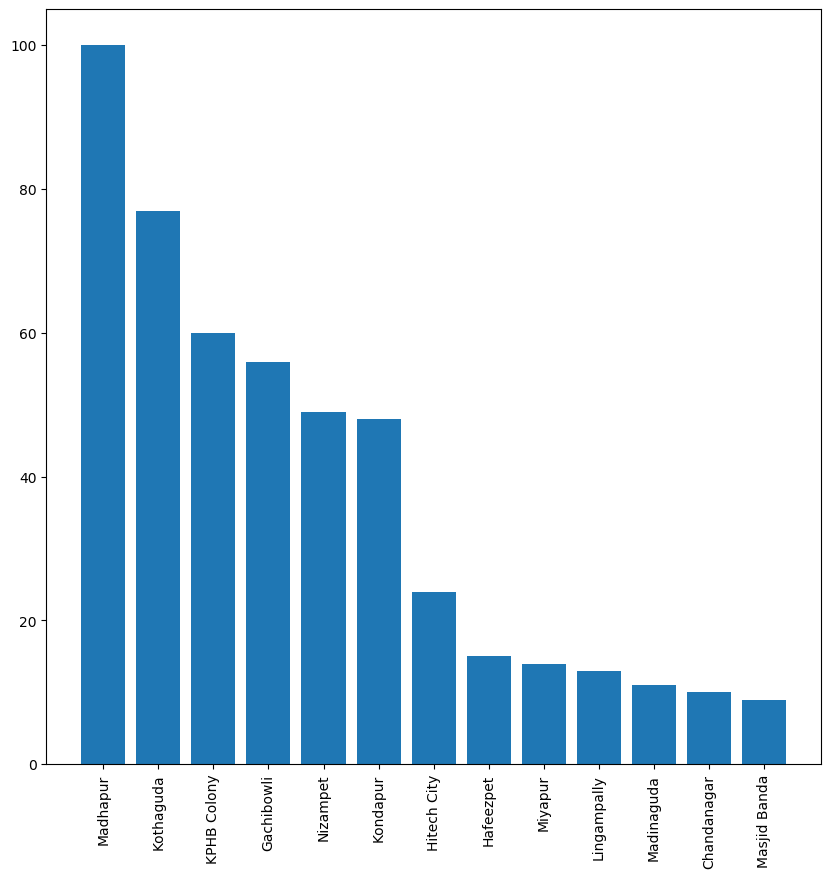

In [63]:
plt.figure(figsize=(10,10),dpi=100)
plt.bar(hyd_venues['Neighborhood'].value_counts().index,hyd_venues['Neighborhood'].value_counts().values)
plt.xticks(rotation=90)
plt.savefig('Fig1.png')

In [64]:
hyd_venues['Neighborhood'].value_counts()

Madhapur        100
Kothaguda        77
KPHB Colony      60
Gachibowli       56
Nizampet         49
Kondapur         48
Hitech City      24
Hafeezpet        15
Miyapur          14
Lingampally      13
Madinaguda       11
Chandanagar      10
Masjid Banda      9
Name: Neighborhood, dtype: int64

### Visualizing the Venues on the map at the location of west Hyderabad

In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)
   
# add markers to map
for lat, lng, venue in zip(hyd_venues['Venue Latitude'], hyd_venues['Venue Longitude'], hyd_venues['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)

map_newyork

### One-hot Encoding

In [15]:
# one hot encoding
hyd_onehot = pd.get_dummies(hyd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hyd_onehot['Neighborhood'] = hyd_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hyd_onehot.columns[-1]] + list(hyd_onehot.columns[:-1])
hyd_onehot = hyd_onehot[fixed_columns]

hyd_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,...,South Indian Restaurant,Spa,Sports Bar,Stadium,Supermarket,Tex-Mex Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Yoga Studio
0,Gachibowli,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Gachibowli,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gachibowli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gachibowli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Gachibowli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [16]:
hyd_grouped = hyd_onehot.groupby('Neighborhood').mean().reset_index()
hyd_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,...,South Indian Restaurant,Spa,Sports Bar,Stadium,Supermarket,Tex-Mex Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Yoga Studio
0,Chandanagar,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.100000,...,0.100000,0.000000,0.0,0.100000,0.000000,0.0,0.000000,0.100000,0.000000,0.0
1,Gachibowli,0.0,0.000000,0.0,0.0,0.0,0.000000,0.017857,0.017857,0.017857,...,0.017857,0.000000,0.0,0.035714,0.000000,0.0,0.000000,0.000000,0.035714,0.0
2,Hafeezpet,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.066667,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.066667,0.000000,0.0
3,Hitech City,0.0,0.041667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.041667,0.041667,0.0,0.000000,0.041667,0.0,0.000000,0.041667,0.000000,0.0
4,KPHB Colony,0.0,0.016667,0.0,0.0,0.0,0.016667,0.000000,0.000000,0.050000,...,0.000000,0.000000,0.0,0.000000,0.016667,0.0,0.016667,0.000000,0.000000,0.0


### Analyze Each Neighborhood

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hyd_grouped['Neighborhood']

for ind in np.arange(hyd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chandanagar,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
1,Gachibowli,Indian Restaurant,Pizza Place,Hotel,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Stadium
2,Hafeezpet,Indian Restaurant,South Indian Restaurant,Mexican Restaurant,Café,Coffee Shop,Light Rail Station,Bar,Hyderabadi Restaurant,Movie Theater,Spa
3,Hitech City,Food Truck,Mexican Restaurant,Gym,Nightclub,Café,Shopping Mall,Lounge,Coffee Shop,Concert Hall,Department Store
4,KPHB Colony,Indian Restaurant,Fast Food Restaurant,Movie Theater,Multiplex,Pizza Place,Bakery,Shopping Mall,Ice Cream Shop,Department Store,Snack Place


### Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 3 clusters.

In [95]:
# set number of clusters
kclusters = 3

hyd_grouped_clustering = hyd_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(hyd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 0, 0, 1, 0, 0, 1, 0, 2])

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hyd_merged = hyd_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hyd_merged = hyd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
hyd_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gachibowli,17.443622,78.351964,Absolute Barbecues,17.442922,78.357302,BBQ Joint,1,Indian Restaurant,Pizza Place,Hotel,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Stadium
1,Gachibowli,17.443622,78.351964,Karachi Bakery,17.442930,78.355336,Bakery,1,Indian Restaurant,Pizza Place,Hotel,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Stadium
2,Gachibowli,17.443622,78.351964,Chettinaduvilas,17.442858,78.356053,Food Truck,1,Indian Restaurant,Pizza Place,Hotel,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Stadium
3,Gachibowli,17.443622,78.351964,Aviyal,17.441939,78.357185,Vegetarian / Vegan Restaurant,1,Indian Restaurant,Pizza Place,Hotel,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Stadium
4,Gachibowli,17.443622,78.351964,creamstone,17.442998,78.355475,Ice Cream Shop,1,Indian Restaurant,Pizza Place,Hotel,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Stadium


### Visualizing the Clusters

In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyd_merged['Neighborhood Latitude'], hyd_merged['Neighborhood Longitude'], hyd_merged['Neighborhood'], hyd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
hyd_merged.groupby(['Cluster Labels'])['Neighborhood'].count()

Cluster Labels
0    264
1    187
2     35
Name: Neighborhood, dtype: int64

In [91]:
hyd_merged.loc[hyd_merged['Cluster Labels'] == 1, hyd_merged.columns[[0] + list(range(5, hyd_merged.shape[1]))]]['Neighborhood'].value_counts()

KPHB Colony     60
Gachibowli      56
Nizampet        49
Lingampally     13
Masjid Banda     9
Name: Neighborhood, dtype: int64

In [92]:
hyd_merged.loc[hyd_merged['Cluster Labels'] == 2, hyd_merged.columns[[0] + list(range(5, hyd_merged.shape[1]))]]

,Neighborhood,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
253,Chandanagar,78.321252,Bakery,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
254,Chandanagar,78.324598,Stadium,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
255,Chandanagar,78.340943,Pizza Place,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
256,Chandanagar,78.332535,Train Station,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
257,Chandanagar,78.336336,Indian Restaurant,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
258,Chandanagar,78.330000,Pizza Place,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
259,Chandanagar,78.340889,South Indian Restaurant,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
260,Chandanagar,78.341727,Department Store,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
261,Chandanagar,78.321769,Department Store,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar
262,Chandanagar,78.338715,Diner,2,Pizza Place,Department Store,Diner,Train Station,Stadium,South Indian Restaurant,Indian Restaurant,Bakery,Yoga Studio,Cocktail Bar


### Conclusion
Analysing the most popular restaurants in each cluster, the investor should prefer the least popular types as a safe choice. There is no sense in opening same type of business in the same street as competitor.  But bear in mind that descending on the most common venue list we might face an absence of demand for this type of food, and open a restaurant that is not needed in this particular location. Presence of interested customers is a must for a successful business. That is why in our recommendations we offer to stop on 10th and 9th positions. In this report we worked out a methodology to determine the best type of restaurant to open in a promising location. The cluster wise recommendations can help the investors to watch the analysis and take a decision. Recommendations, based on description of each cluster are as follows. 
1.	Cluster 0 or shopping: Madhapur and Kondapur
2.	Cluster 1 or Recreational: Gachibowli and Nizampet
3.	Cluster 2 or Residential: Miyapur and Chandanagar
